# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

In [159]:
# This is google colab Command - Remove On Azure
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

--2020-05-12 00:36:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2281 (2.2K) [application/x-httpd-php]
Saving to: ‘Mirai_labels.csv.gz.1’

Mirai_labels.csv.gz 100%[===================>]   2.23K  --.-KB/s    in 0s      

2020-05-12 00:36:46 (67.5 MB/s) - ‘Mirai_labels.csv.gz.1’ saved [2281/2281]



In [160]:
# This is google colab Command - Remove On Azure
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

--2020-05-12 00:36:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328662266 (313M) [application/x-httpd-php]
Saving to: ‘Mirai_dataset.csv.gz.1’

Mirai_dataset.csv.g 100%[===================>] 313.44M  22.3MB/s    in 15s     

2020-05-12 00:37:05 (20.8 MB/s) - ‘Mirai_dataset.csv.gz.1’ saved [328662266/328662266]



In [161]:
# This is google colab Command - Remove On Azure
!gunzip Mirai_dataset.csv.gz

!gunzip Mirai_labels.csv.gz

gzip: Mirai_dataset.csv already exists; do you wish to overwrite (y or n)? n
	not overwritten
gzip: Mirai_labels.csv already exists; do you wish to overwrite (y or n)? n
	not overwritten


# Part 2: Get a graphics card

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [0]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

In [0]:
#Answer 1: The graphic card is: Tesla K80

In [0]:
#Answer 2: The number of CUDA cores is 4992

In [0]:
#Answer 3: The size of memory is 12 GB

In [0]:
#Answer 4: What is stored in the GPU is the mini batch and we could store trainable parameters
# The Gradient of the parameters , Intermediate outputs and Activations for different layers.

In [0]:
#Answer 5: We have 6 CPUs (Intel(R) Xeon(R) CPU E5-2690 v3 @ 2.60GHz) with speed of 2596.989, with 6 cores each, and one thread per core

In [0]:
#Answer 6: The totla RAM size is 55 GB, and the available is 53 GB.

# Part 4: Load the data

Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. 

We will use the function `genfromtxt` to load the data.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.




In [169]:
from numpy import genfromtxt
import numpy as np

# Load data from file
covariates = genfromtxt('Mirai_dataset.csv',delimiter=",")
labels = genfromtxt('Mirai_labels.csv',delimiter=",")

X = covariates
Y = labels



# Save data as numpy arrays, for faster loading in future calls to this cell
np.save('Mirai_data.npy', X)
np.save('Mirai_labels.npy', Y)

# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')


# Remove the first 24 covariates
remove_cols = np.array([range(24)])
X = np.delete(X, remove_cols, 1) # column wise (axis = 1)

# Print the number of examples of each class
print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))
print("The number of class 0 is {}".format(len(Y[Y==0])))
print("The number of class 1 is {}".format(len(Y[Y==1])))

The covariates have size (764137, 92).
The labels have size (764137,).
The number of class 0 is 121621
The number of class 1 is 642516


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

**Highest Classification performance can be  =  # class 1 examples / Total Examples**

**642516 / 764137 = 84%**

In [170]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

    
# Print the number of NaNs (not a number) in the labels
print('Number of NaNs in the covariates {}.'.format(np.count_nonzero(np.isnan(Y))))

# Print the number of NaNs in the covariates
print('Number of NaNs in the labels {}.'.format(np.count_nonzero(np.isnan(X))))

#The values are zeros because we already removed the NaNs from the data.

Number of NaNs in the covariates 0.
Number of NaNs in the labels 0.


# Part 6: Preprocessing

Lets do some simple preprocessing

In [0]:
# Convert covariates to floats
X_floats = X.astype(float)

# Convert labels to ints
Y_floats = Y.astype(int)

# Remove mean of each covariate (column) and
# Divide each covariate (column) by its standard deviation
X_floats = (X_floats - np.mean(X_floats,axis=0)) / np.std(X_floats,axis=0)


####### Alternative Approach ########
# for ind in range(X.shape[1]):
#     X_floats[ind] = X_floats[ind] - np.mean(X_floats[ind])
#     # Divide each covariate (column) by its standard deviation
#     X_floats[ind] = X_floats[ind] / np.std(X_floats[ind])
#     print(np.mean(X_floats[ind]))
#     print(np.std(X_floats[ind]))


# for ind in range(X.shape[1]):
#     colMean = np.mean(X_floats[:,ind])
#     colStd = np.std(X_floats[:,ind])
#     X_floats[:,ind] = (X_floats[:,ind] - colMean) / colStd
#     Divide each covariate (column) by its standard deviation
#     X_floats[:,ind] = X_floats[:,ind] / np.std(X_floats[:,ind])
#     print(np.mean(X_floats[:,ind]))
#     print(np.std(X_floats[:,ind]))

####### Alternative Approach ########

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
#The mean value is very close to zero, and the standard deviation is 1 for all covariates

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [172]:
# Your code
import sklearn as sk
from sklearn.model_selection import train_test_split
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X_floats, Y_floats, train_size=0.7,shuffle=False)
# Ytrain, Ytemp = train_test_split(Y_floats, train_size=0.70, test_size=0.30)
print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

# print("The number of class 0 is {}".format(len(Ytrain[Ytrain==0])))
# print("The number of class 1 is {}".format(len(Ytrain[Ytrain==1])))

for i in range(2):

    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

    print("Number of validation examples for class {} is {}" .format(i,np.sum(Ytemp == i)))

Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
Number of training examples for class 0 is 121621
Number of validation examples for class 0 is 0
Number of training examples for class 1 is 413274
Number of validation examples for class 1 is 229242


# Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not?

**Actually We could see that there were 0 examples for class 1 in the validation set. Since we need some validation examples for class 0 we can't use dataset as it it.**



Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [173]:
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix

#We can't use the data as it is, we have to shuffle it first, 
#and it also has NaNs fields which effect the training process, so we need to remove those first.

# Randomly shuffle data, to get both classes in training and testing
X_coo = coo_matrix(X_floats)

X_floats, X_coo, Y_floats = shuffle(X_floats, X_coo, Y_floats, random_state=0)


# Divide the data into training and validation/test again
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X_floats, Y_floats, train_size=0.7,shuffle=False)
# Xtrain, Xtemp = train_test_split(X_floats, train_size=0.70, test_size=0.30)
# Ytrain, Ytemp = train_test_split(Y_floats, train_size=0.70, test_size=0.30)

# Print the number of examples of each class, for the training data and the remaining 30%
print("Training Data: The number of class 0 after shuffeling is {}".format(len(Ytrain[Ytrain==0])))
print("Training Data: The number of class 1 after shuffeling is {}".format(len(Ytrain[Ytrain==1])))

print('--------------------------------------')
print("Testing Data: The number of class 0 after shuffeling is {}".format(len(Ytemp[Ytemp==0])))
print("Testing Data: The number of class 1 after shuffeling is {}".format(len(Ytemp[Ytemp==1])))

Training Data: The number of class 0 after shuffeling is 85010
Training Data: The number of class 1 after shuffeling is 449885
--------------------------------------
Testing Data: The number of class 0 after shuffeling is 36611
Testing Data: The number of class 1 after shuffeling is 192631


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [174]:
from sklearn.model_selection import train_test_split

Xtest, Xval, Ytest, Yval = train_test_split(Xtemp, Ytemp, test_size=0.5)
# Yval, Ytest = train_test_split(Ytemp, train_size=0.50, test_size=0.50)


print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 10: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [0]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy as BC
from keras.layers.normalization import BatchNormalization

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)


def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    # Setup optimizer, depending on input parameter string
    opti = SGD(lr=learning_rate)
    if optimizer == 'adam':
        opti = Adam(lr=learning_rate)
    
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    
    # Add first layer, requires input shape
    model.add(Dense(n_nodes, activation = act_fun, input_dim = input_shape))
    if use_bn == True:
        model.add(BatchNormalization())
    if use_dropout == True:
        model.add(Dropout(0.5))
    if use_custom_dropout == True:
        model.add(myDropout(0.5))
    
    
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation = act_fun))
        if use_bn == True:
            model.add(BatchNormalization())
        if use_dropout == True:
            model.add(Dropout(0.5))
        if use_custom_dropout == True:
            model.add(myDropout(0.5))
    
           
    # Final layer
    model.add(Dense(1, activation = 'sigmoid'))
    '''
    if use_bn == True:
        model.add(BatchNormalization())
    
    '''
    
    # Compile model
    model.compile(optimizer = opti,loss = BC, metrics=['accuracy'])

    return model

In [0]:
# Lets define a help function for plotting the training results

# IMPORTANT NOTE
# The history unfortunately behaves a bit randomly for every user
# If the plots for accuracy and loss look mixed, change the order of
# val_loss, val_acc, loss, acc
# until the plots look as they "should"

import matplotlib.pyplot as plt
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()


# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [177]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape[1]

# Build the model
model1 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20,
                   learning_rate = 0.1)

# Train the model, provide training data and validation data
history1 = model1.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size)
model1.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4351 - accuracy: 0.8411 - val_loss: 0.4053 - val_accuracy: 0.8404
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.3874 - accuracy: 0.8411 - val_loss: 0.3692 - val_accuracy: 0.8404
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.3470 - accuracy: 0.8411 - val_loss: 0.3245 - val_accuracy: 0.8404
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.3010 - accuracy: 0.8411 - val_loss: 0.2791 - val_accuracy: 0.8404
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2601 - accuracy: 0.8472 - val_loss: 0.2444 - val_accuracy: 0.8560
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2320 - accuracy: 0.8634 - val_loss: 0.2228 - val_accuracy: 0.8753
Epoch 7/20
534895/534895 [==============================] - 

In [178]:
# Evaluate the model on the test data
score = model1.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 36us/step
Test loss: 0.1719
Test accuracy: 0.9103


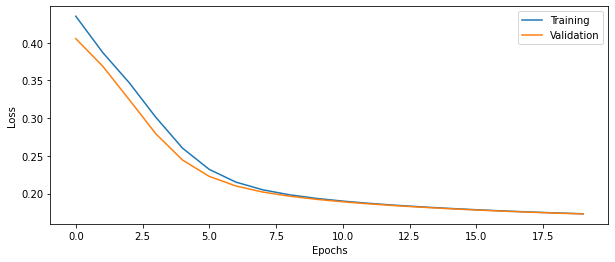

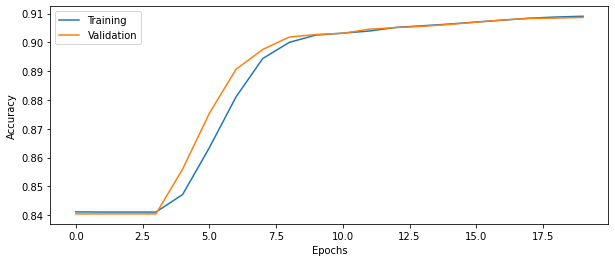

In [179]:
# Plot the history from the training run
plot_results(history1)
#plot_results_mod(history1)

# Part 12: More questions

Question 9: What happens if you add several Dense layers without specifying the activation function?

**Without the activation, Dense layer is acting as a linear layer. We could use these layers to reduce dimensionality**


Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?

**The default kernel initializer is 'glorot_uniform', it's also called Xavier uniform initializer, and it draws the weight from a uniform distribution. and the default bias intializer is 'zeros'.**


# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [180]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights_set = class_weight.compute_class_weight('balanced',
                                                      np.unique(Ytrain),
                                                      Ytrain)

# Print the class weights
print(class_weights_set)


[3.14607105 0.5944797 ]


### 2 layers, 20 nodes, class weights

In [181]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model2 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20)

history2 = model2.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model2.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.5941 - accuracy: 0.7520 - val_loss: 0.5003 - val_accuracy: 0.8404
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4685 - accuracy: 0.8411 - val_loss: 0.4481 - val_accuracy: 0.8404
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4380 - accuracy: 0.8411 - val_loss: 0.4317 - val_accuracy: 0.8404
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4267 - accuracy: 0.8411 - val_loss: 0.4241 - val_accuracy: 0.8404
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4205 - accuracy: 0.8411 - val_loss: 0.4189 - val_accuracy: 0.8404
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4158 - accuracy: 0.8411 - val_loss: 0.4146 - val_accuracy: 0.8404
Epoch 7/20
534895/534895 [==============================] - 

In [182]:
# Evaluate model on test data
score = model2.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 36us/step
Test loss: 0.3514
Test accuracy: 0.8402


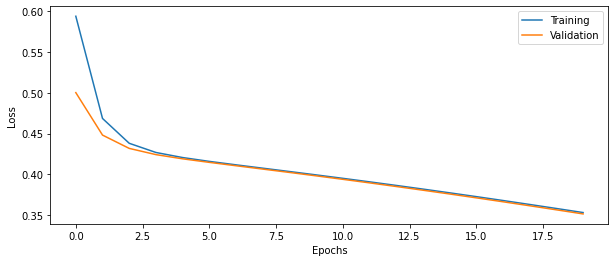

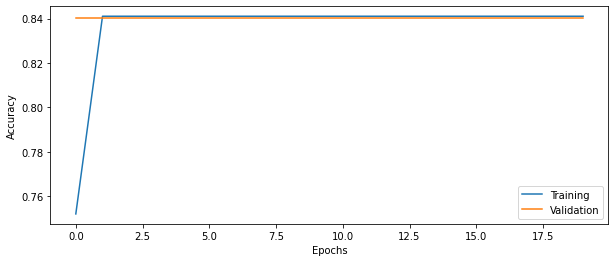

In [183]:
plot_results(history2)

# Part 14: More questions

Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

**we use batch size because we can't fit all the data in the GPU memory, so we divide it into batches**

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.
**The GPU memory used is: 158,335 MB, and the GPU utilization went up to 32 %**

Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results.   

**The processing time for one training epoch and 100 batch size is: 12 seconds  
The processing time for one training epoch and 1000 batch size is: 2 seconds    
The processing time for one training epoch and 10000 batch size is: 1 second**

**When we use large batch size, we keep the GPU bussy by utilizing all the 4992 cores, whilst when we give the GPU a small batch size it will not use its full capacity, so the more data we give to the GPU the more decrease in time we will see in the training**

Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

**The number of times the weight are updated in the DNN when using a batch size of 100 is: 5348.95  
The number of times the weight are updated in the DNN when using a batch size of 1000 is: 534.895  
The number of times the weight are updated in the DNN when using a batch size of 10000 is: 53.4895**

Question 15: What limits how large the batch size can be?

**The following can effect the size of batch:  
1- Available GPU memory bytes  
2- Size of tensors  
3- Trainable parameters)**

**The GPU memory and the RAM**

Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

**Batch size and the learning rate is closely releated. Hence Low batch sizemay need smaller learning rate as gradient is more certain. And also Large batch size, may need larger learning rate, because of fewer weight updates in total**

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

In [184]:
# This is for testing the GPU memory with a batch size of 100
batch_size = 10000
epochs = 20
#14  how many times weights are updated with 100 batch size
#13 testing with one training epoch and a batch size of 100
#epochs = 1
#13 testing with one epoch and a 1000 batch size
#batch_size = 1000
#14 how many times weights are updated with 1000 batch size
#13 testing with one epoch and a 10000 batch size
#batch_size = 10000
#14 how many times weights are updated with 10000 batch size
input_shape = Xtrain.shape[1]

# Build and train model
model2 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20,
                   learning_rate = 0.1)

history2 = model2.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      verbose = 1)
model2.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4460 - accuracy: 0.8159 - val_loss: 0.4006 - val_accuracy: 0.8404
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.3767 - accuracy: 0.8411 - val_loss: 0.3515 - val_accuracy: 0.8404
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.3236 - accuracy: 0.8411 - val_loss: 0.2963 - val_accuracy: 0.8404
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2721 - accuracy: 0.8414 - val_loss: 0.2512 - val_accuracy: 0.8451
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2356 - accuracy: 0.8567 - val_loss: 0.2236 - val_accuracy: 0.8721
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2146 - accuracy: 0.8868 - val_loss: 0.2082 - val_accuracy: 0.8982
Epoch 7/20
534895/534895 [==============================] - 

# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

**4 Dense Layer with 50 Nodes - Trainable params: 3,141**

**2 Dense Layer with 20 Nodes - Trainable params: 2,301**

### 4 layers, 20 nodes, class weights

In [185]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model3 = build_DNN(input_shape = input_shape,
                   n_layers = 4,
                   n_nodes = 20,
                   learning_rate = 0.1)

history3 = model3.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model3.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4732 - accuracy: 0.8022 - val_loss: 0.4392 - val_accuracy: 0.8404
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4380 - accuracy: 0.8411 - val_loss: 0.4391 - val_accuracy: 0.8404
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4379 - accuracy: 0.8411 - val_loss: 0.4389 - val_accuracy: 0.8404
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4378 - accuracy: 0.8411 - val_loss: 0.4388 - val_accuracy: 0.8404
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4376 - accuracy: 0.8411 - val_loss: 0.4386 - val_accuracy: 0.8404
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4375 - accuracy: 0.8411 - val_loss: 0.4385 - val_accuracy: 0.8404
Epoch 7/20
534895/534895 [==============================] - 

In [186]:
# Evaluate model on test data
score = model3.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 38us/step
Test loss: 0.4352
Test accuracy: 0.8402


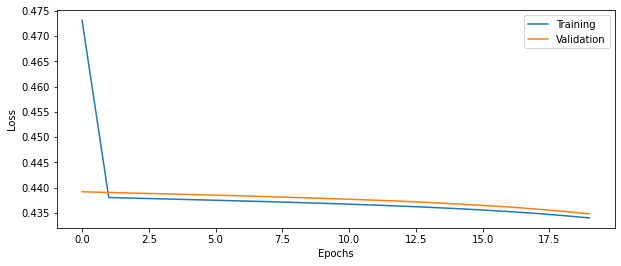

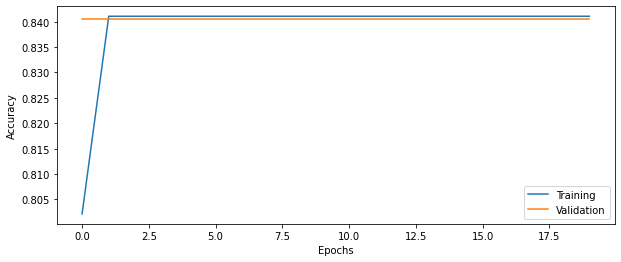

In [187]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [216]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model4 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 50,
                   learning_rate = 0.1)

history4 = model4.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model4.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.4190 - accuracy: 0.8411 - val_loss: 0.3817 - val_accuracy: 0.8404
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.3459 - accuracy: 0.8411 - val_loss: 0.3087 - val_accuracy: 0.8404
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2754 - accuracy: 0.8459 - val_loss: 0.2469 - val_accuracy: 0.8536
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2284 - accuracy: 0.8653 - val_loss: 0.2150 - val_accuracy: 0.8801
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2063 - accuracy: 0.8888 - val_loss: 0.2006 - val_accuracy: 0.8973
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1959 - accuracy: 0.9015 - val_loss: 0.1931 - val_accuracy: 0.9028
Epoch 7/20
534895/534895 [==============================] - 

In [217]:
# Evaluate model on test data
score = model4.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 38us/step
Test loss: 0.1688
Test accuracy: 0.9095


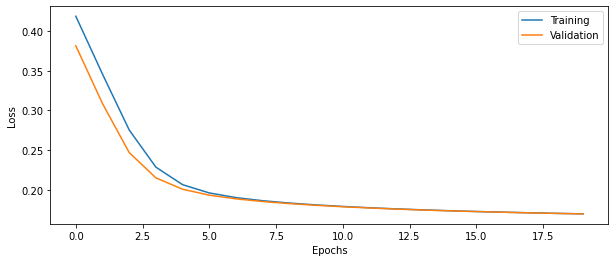

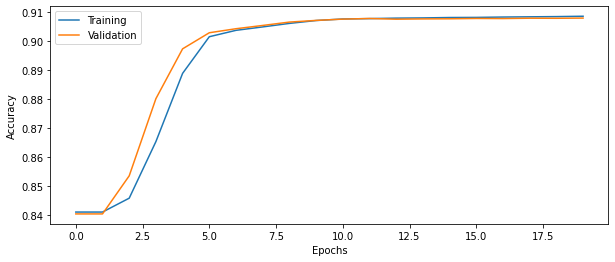

In [218]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [191]:
# Setup some training parameters
batch_size = 10000
epochs = 10
input_shape = Xtrain.shape[1]

# Build and train model
model5 = build_DNN(input_shape = input_shape,
                   n_layers = 4,
                   n_nodes = 50,
                  learning_rate = 0.1)

history5 = model5.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model5.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/10
534895/534895 [==============================] - 1s 1us/step - loss: 0.4535 - accuracy: 0.8283 - val_loss: 0.4380 - val_accuracy: 0.8404
Epoch 2/10
534895/534895 [==============================] - 1s 1us/step - loss: 0.4368 - accuracy: 0.8411 - val_loss: 0.4377 - val_accuracy: 0.8404
Epoch 3/10
534895/534895 [==============================] - 1s 1us/step - loss: 0.4365 - accuracy: 0.8411 - val_loss: 0.4373 - val_accuracy: 0.8404
Epoch 4/10
534895/534895 [==============================] - 1s 1us/step - loss: 0.4361 - accuracy: 0.8411 - val_loss: 0.4369 - val_accuracy: 0.8404
Epoch 5/10
534895/534895 [==============================] - 1s 1us/step - loss: 0.4357 - accuracy: 0.8411 - val_loss: 0.4365 - val_accuracy: 0.8404
Epoch 6/10
534895/534895 [==============================] - 1s 1us/step - loss: 0.4352 - accuracy: 0.8411 - val_loss: 0.4360 - val_accuracy: 0.8404
Epoch 7/10
534895/534895 [==============================] - 

In [192]:
# Evaluate model on test data
score = model5.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 38us/step
Test loss: 0.4332
Test accuracy: 0.8402


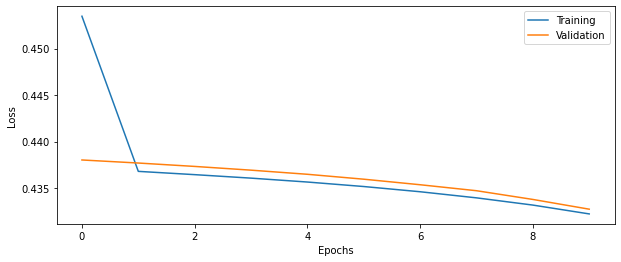

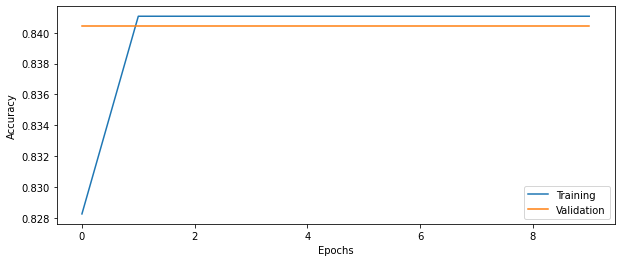

In [193]:
plot_results(history5)

# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 18: Why is batch normalization important when training deep networks?

**Batch Normalizing is a technique for improving speed, performance and stability when training deep neural networks. This standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.**

**Batch Normalization allows the use of higher learning rates while being less careful about initialization, and in some cases it eliminates the need for Dropouts**

### 2 layers, 20 nodes, class weights, batch normalization

In [194]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model6 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20,
                   learning_rate = 0.1,
                   use_bn = True)

history6 = model6.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model6.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3165 - accuracy: 0.8808 - val_loss: 0.5115 - val_accuracy: 0.8404
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1930 - accuracy: 0.9098 - val_loss: 0.3774 - val_accuracy: 0.8404
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1753 - accuracy: 0.9121 - val_loss: 0.3454 - val_accuracy: 0.8404
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1679 - accuracy: 0.9136 - val_loss: 0.3225 - val_accuracy: 0.8404
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1636 - accuracy: 0.9149 - val_loss: 0.2945 - val_accuracy: 0.8404
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1606 - accuracy: 0.9160 - val_loss: 0.2463 - val_accuracy: 0.8428
Epoch 7/20
534895/534895 [==============================] - 

In [195]:
# Evaluate model on test data
score = model6.evaluate(x = Xtest,
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 6s 51us/step
Test loss: 0.1476
Test accuracy: 0.9225


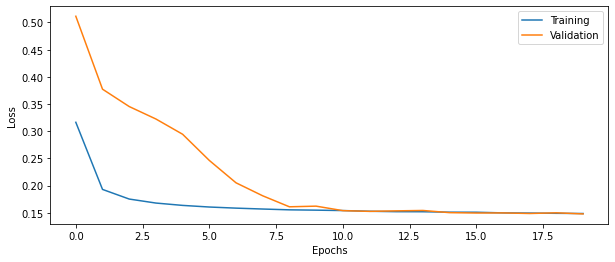

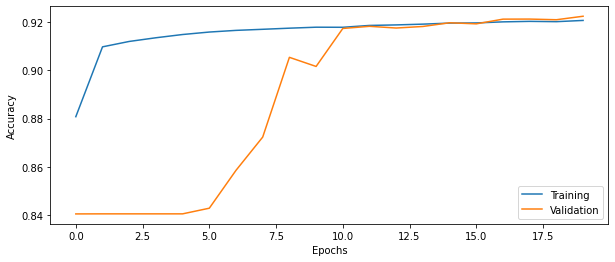

In [196]:
plot_results(history6)

# Part 17: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [197]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model7 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20,
                   use_bn = False,
                   learning_rate = 0.1,
                   act_fun = 'relu')

history7 = model7.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model7.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2635 - accuracy: 0.8865 - val_loss: 0.1928 - val_accuracy: 0.9027
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1843 - accuracy: 0.9077 - val_loss: 0.1807 - val_accuracy: 0.9093
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1766 - accuracy: 0.9111 - val_loss: 0.1756 - val_accuracy: 0.9122
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1725 - accuracy: 0.9124 - val_loss: 0.1725 - val_accuracy: 0.9124
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1696 - accuracy: 0.9127 - val_loss: 0.1700 - val_accuracy: 0.9133
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1673 - accuracy: 0.9130 - val_loss: 0.1682 - val_accuracy: 0.9128
Epoch 7/20
534895/534895 [==============================] - 

In [198]:
# Evaluate model on test data
score = model7.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 36us/step
Test loss: 0.1529
Test accuracy: 0.9184


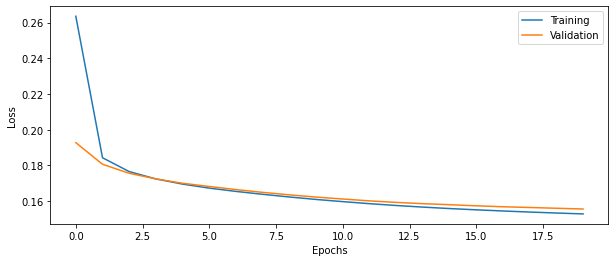

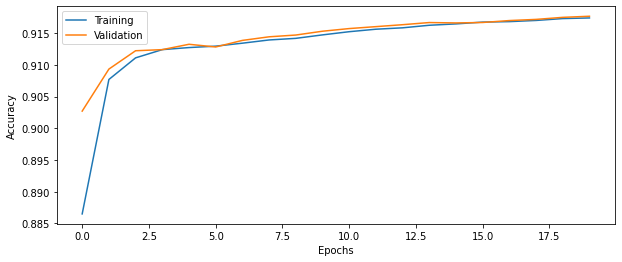

In [199]:
plot_results(history7)

# Part 18: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [200]:
# Setup some training parameters
#from keras.optimizers import adam
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model8 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20,
                   use_bn = False,
                   act_fun = 'sigmoid',
                   optimizer = 'adam',
                   learning_rate = 0.1)

history8 = model8.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model8.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.2032 - accuracy: 0.8822 - val_loss: 0.1585 - val_accuracy: 0.9159
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1552 - accuracy: 0.9180 - val_loss: 0.1534 - val_accuracy: 0.9196
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1507 - accuracy: 0.9200 - val_loss: 0.1486 - val_accuracy: 0.9182
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1460 - accuracy: 0.9208 - val_loss: 0.1468 - val_accuracy: 0.9197
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1437 - accuracy: 0.9212 - val_loss: 0.1415 - val_accuracy: 0.9220
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1412 - accuracy: 0.9223 - val_loss: 0.1405 - val_accuracy: 0.9226
Epoch 7/20
534895/534895 [==============================] - 

In [201]:
# Evaluate model on test data
score = model8.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 36us/step
Test loss: 0.1281
Test accuracy: 0.9325


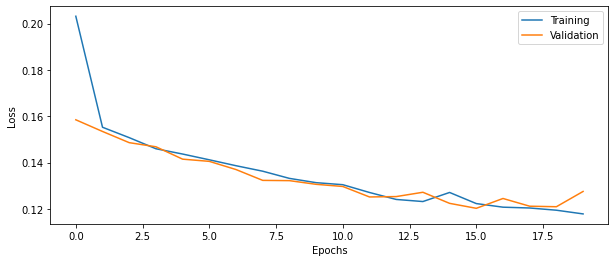

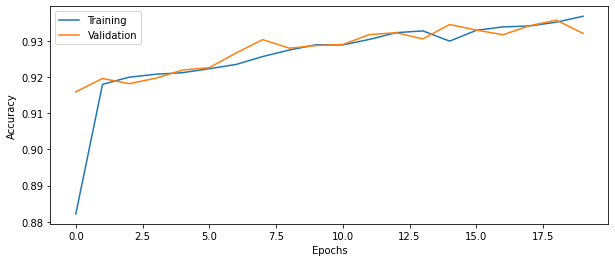

In [202]:
plot_results(history8)

# Part 19: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer), with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/layers/core/ for how the Dropout layer works.

---

Question 19: How does the validation accuracy change when adding dropout?  

**When adding dropout the validation accuracy is: 0.93**  

Question 20: How does the test accuracy change when adding dropout?  

**When adding dropout the test accuracy is: 0.8412**

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [203]:
# Setup some training parameters
#from keras.layers import dropout
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model9 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 20,
                   use_bn = False,
                   act_fun = 'sigmoid',
                   optimizer = 'sgd',
                   use_dropout = True)

history9 = model8.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
model9.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1220 - accuracy: 0.9337 - val_loss: 0.1188 - val_accuracy: 0.9343
Epoch 2/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1179 - accuracy: 0.9362 - val_loss: 0.1174 - val_accuracy: 0.9350
Epoch 3/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1216 - accuracy: 0.9335 - val_loss: 0.1188 - val_accuracy: 0.9357
Epoch 4/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1174 - accuracy: 0.9362 - val_loss: 0.1165 - val_accuracy: 0.9379
Epoch 5/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1163 - accuracy: 0.9370 - val_loss: 0.1252 - val_accuracy: 0.9333
Epoch 6/20
534895/534895 [==============================] - 1s 1us/step - loss: 0.1190 - accuracy: 0.9350 - val_loss: 0.1163 - val_accuracy: 0.9357
Epoch 7/20
534895/534895 [==============================] - 

In [204]:
# Evaluate model on test data
score = model9.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 5s 41us/step
Test loss: 0.5479
Test accuracy: 0.8402


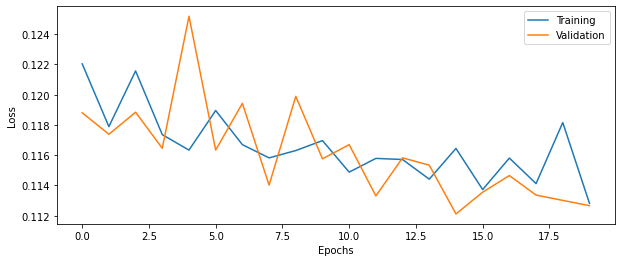

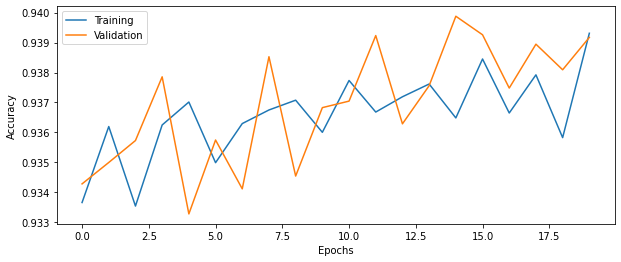

In [205]:
plot_results(history9)

# Part 20: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 21: How high classification accuracy can you achieve for the test data? What is your best configuration?  
**The highest classification accuracy is 0.9390  
And that's obtained when using the following parameters:  
Activation Function = sigmoid    
Optimizer = Adam  
Tow layers with 50 nodes in each layer  
with a batch size of 10000  
30 epochs and class weight**

In [206]:
# Find your best configuration for the DNN
##These are initial values :) 
batch_size = 10000
epochs = 30
input_shape = Xtrain.shape[1]

# Build and train DNN
model10 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 50,
                   use_bn = False,
                   act_fun = 'sigmoid',
                   optimizer = 'adam',
                   learning_rate = 0.01)

history10 = model10.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                       class_weight = class_weights_set)
model10.summary()
#93.68

Train on 534895 samples, validate on 114621 samples
Epoch 1/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.2645 - accuracy: 0.8526 - val_loss: 0.1791 - val_accuracy: 0.9042
Epoch 2/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1703 - accuracy: 0.9108 - val_loss: 0.1645 - val_accuracy: 0.9147
Epoch 3/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1609 - accuracy: 0.9163 - val_loss: 0.1578 - val_accuracy: 0.9179
Epoch 4/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1547 - accuracy: 0.9181 - val_loss: 0.1522 - val_accuracy: 0.9190
Epoch 5/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1498 - accuracy: 0.9192 - val_loss: 0.1476 - val_accuracy: 0.9199
Epoch 6/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1459 - accuracy: 0.9210 - val_loss: 0.1445 - val_accuracy: 0.9206
Epoch 7/30
534895/534895 [==============================] - 

In [207]:
# Evaluate DNN on test data
score = model10.evaluate(x = Xtest, 
                        y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 4s 36us/step
Test loss: 0.1165
Test accuracy: 0.9358


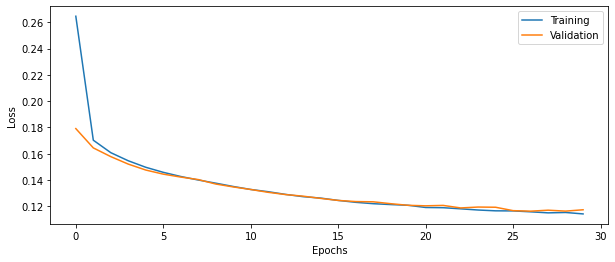

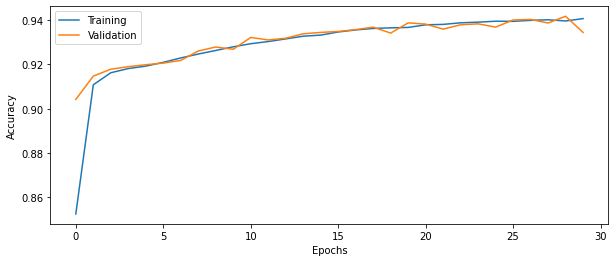

In [208]:
plot_results(history10)

# Part 21: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 22: What is the mean and the standard deviation of the test accuracy?

In [0]:
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [210]:
# Your best training parameters
batch_size = 10000
epochs = 30
input_shape = Xtrain.shape[1]


# Build and train model
model11 = build_DNN(input_shape = input_shape,
                   n_layers = 2,
                   n_nodes = 50,
                   use_bn = False,
                   act_fun = 'sigmoid',
                   optimizer = 'adam',
                   learning_rate = 0.01,
                   use_custom_dropout = True
                   )

history11 = model10.fit(x = Xtrain,
                      y = Ytrain,
                      validation_data = (Xval,Yval),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set
                    )
model11.summary()

Train on 534895 samples, validate on 114621 samples
Epoch 1/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1143 - accuracy: 0.9401 - val_loss: 0.1147 - val_accuracy: 0.9422
Epoch 2/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1142 - accuracy: 0.9404 - val_loss: 0.1146 - val_accuracy: 0.9420
Epoch 3/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1132 - accuracy: 0.9414 - val_loss: 0.1147 - val_accuracy: 0.9398
Epoch 4/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1129 - accuracy: 0.9412 - val_loss: 0.1167 - val_accuracy: 0.9364
Epoch 5/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1134 - accuracy: 0.9407 - val_loss: 0.1156 - val_accuracy: 0.9398
Epoch 6/30
534895/534895 [==============================] - 1s 1us/step - loss: 0.1121 - accuracy: 0.9416 - val_loss: 0.1142 - val_accuracy: 0.9417
Epoch 7/30
534895/534895 [==============================] - 

In [215]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(x = Xtest, 
                        y = Ytest)
                       
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 5s 40us/step
Test accuracy: 0.5807


In [212]:
# Run the testing 100 times, and save the accuracies in an array
from math import sqrt
accuracy = [model11.evaluate(x = Xtest, y = Ytest)[1] for _ in range(100)]

# Calculate and print mean and std of accuracies

print('The mean of the accuracy is: {}'.format(np.mean(accuracy)))
print('The SD of the accuracy is: {}'.format(np.std(accuracy)))

114621/114621 [==============================] - 4s 39us/step
The mean of the accuracy is: 0.5783156669139862
The SD of the accuracy is: 0.0014454476904310098


# Part 22: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 23: What is the mean and the standard deviation of the test accuracy?    

**The mean is: 0.5783156669139862, and the SD is: 0.0.0014454476904310098, due to different values used for testing the model by dropout**

Question 24: What is the main advantage of dropout compared to CV for estimating test uncertainty?  

**The main advantage of dropout over CV, is that it is faster than CV, if training time is one day using dropout it will take 5 days for a 5-folds CV**

In [214]:
from sklearn.model_selection import StratifiedKFold
import math

# Define 10-fold cross validation 

ten_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
folds = ten_folds.get_n_splits(X_floats, Y_floats)
accuracy = []
# Loop over cross validation folds
for train_index, test_index in ten_folds.split(Xtrain, Ytrain):
        # Calculate class weights for current split
        class_weights_set = class_weight.compute_class_weight('balanced',
                                                          np.unique(Y_floats[train_index]),
                                                          Y_floats[train_index])
        input_shape = X_floats[train_index].shape[1]
        # Print the class weights
        print(class_weights_set)
    # Rebuild the DNN model, to not continue training on the previously trained model
        model = build_DNN(input_shape = input_shape,
                   n_layers = 10,
                   n_nodes = 20,
                   use_bn = True,
                   act_fun = 'relu',
                   optimizer = 'adam',
                   use_dropout = False,
                   learning_rate = 0.1)
    # Fit the model with training set and class weights for this fold
        history = model.fit(x = X_floats[train_index],
                      y = Y_floats[train_index],
                      validation_data = (X_floats[test_index],Y_floats[test_index]),
                      epochs = epochs,
                      batch_size = batch_size,
                      class_weight = class_weights_set)
    # Evaluate the model using the test set for this fold
        score = model.evaluate(x = X_floats[test_index], y = Y_floats[test_index])
    # Save the test accuracy in an array
        accuracy.append(score[1])
# Calculate and print mean and std of accuracies
accuracy = np.array(accuracy)
print('The mean of the accuracy is: {}'.format(np.mean(accuracy)))
print('The STD of the accuracy is: {}'.format(np.std(accuracy)))


[3.14606778 0.59447982]
Train on 481405 samples, validate on 53490 samples
Epoch 1/30
481405/481405 [==============================] - 3s 5us/step - loss: 0.2134 - accuracy: 0.8888 - val_loss: 30.8787 - val_accuracy: 0.1595
Epoch 2/30
481405/481405 [==============================] - 1s 2us/step - loss: 0.1603 - accuracy: 0.9128 - val_loss: 1.9583 - val_accuracy: 0.1532
Epoch 3/30
481405/481405 [==============================] - 1s 2us/step - loss: 0.1546 - accuracy: 0.9164 - val_loss: 0.1968 - val_accuracy: 0.9099
Epoch 4/30
481405/481405 [==============================] - 1s 2us/step - loss: 0.1528 - accuracy: 0.9171 - val_loss: 0.2199 - val_accuracy: 0.9137
Epoch 5/30
481405/481405 [==============================] - 1s 2us/step - loss: 0.1525 - accuracy: 0.9166 - val_loss: 0.1882 - val_accuracy: 0.9177
Epoch 6/30
481405/481405 [==============================] - 1s 2us/step - loss: 0.1501 - accuracy: 0.9177 - val_loss: 0.1867 - val_accuracy: 0.9179
Epoch 7/30
481405/481405 [==========

# Part 23: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 25: How would you change the DNN in order to use it for regression instead?

**In regression, the output variable is numerical (or continuous) we can use mean_squared_error (MSE) as a loss function instead of crossentropy or categorical_crossentropy in classification. As for the optimizer we can use Adaptive moment estimation (Adam) for both classification and regression. And we need to change the activation function for the last layer to a linear one in regression (well noted)**

## Report

Send in this jupyter notebook, with answers to all questions.

## References

https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

https://medium.com/lean-in-women-in-tech-india/google-colab-the-beginners-guide-5ad3b417dfa

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras